<a href="https://colab.research.google.com/github/manishrathod2003/Machine-Learning/blob/main/Day5_03march.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assumptions of Linear Regression:
- Linearity
- Homoscedasticity & Heteroscedasticity
- Normality
- No multicollinearity, Range: -1 to 1
- No auto-correlation

p-value < 0.05   --> Error is less than 5%  (Accuracy 95%)

p-value is high then significance is less.

VIF(Variance Inflation Factor) > 20-50  --> High Multi-Collinear  
VIF < 10 ---> Everything is OK.

Ordinary Least Squares(OSL Model)

Linear Regression  
dependent variable --> continuous

Logistic Regression       (Probability Classifier)

dependent variable --> categorical

S-shape curve --> sigmoid(logis.) --> y=1/(1+e^-x)

Threshold

Problem Statement: Given details of users, train a model to predict whether the customer will make a purchase or not?

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [ ]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           396 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
#Check for Null Values
df.isnull().sum()

,0
User ID,0
Gender,4
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
df_null=df[df.isna().any(axis=1)]
print(df_null)

     User ID Gender  Age  EstimatedSalary  Purchased
14  15628972    NaN   18            82000          0
18  15704583    NaN   46            28000          1
23  15599081    NaN   45            22000          1
29  15669656    NaN   31            18000          0


In [ ]:
#Perform encoding on categorical feature: Gender
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       1   19            19000          0
1    15810944       1   35            20000          0
2    15668575       0   26            43000          0
3    15603246       0   27            57000          0
4    15804002       1   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       0   46            41000          1
396  15706071       1   51            23000          1
397  15654296       0   50            20000          1
398  15755018       1   36            33000          0
399  15594041       0   49            36000          1

[400 rows x 5 columns]


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB
None


In [ ]:
df.drop(['User ID'],axis=1,inplace=True)
print(df)

     Gender  Age  EstimatedSalary  Purchased
0         1   19            19000          0
1         1   35            20000          0
2         0   26            43000          0
3         0   27            57000          0
4         1   19            76000          0
..      ...  ...              ...        ...
395       0   46            41000          1
396       1   51            23000          1
397       0   50            20000          1
398       1   36            33000          0
399       0   49            36000          1

[400 rows x 4 columns]


In [ ]:
#Scaling Numerical Features
sc=StandardScaler()
df['Age']=sc.fit_transform(df[['Age']])
df['EstimatedSalary']=sc.fit_transform(df[['EstimatedSalary']])
print(df)

     Gender       Age  EstimatedSalary  Purchased
0         1 -1.781797        -1.490046          0
1         1 -0.253587        -1.460681          0
2         0 -1.113206        -0.785290          0
3         0 -1.017692        -0.374182          0
4         1 -1.781797         0.183751          0
..      ...       ...              ...        ...
395       0  0.797057        -0.844019          1
396       1  1.274623        -1.372587          1
397       0  1.179110        -1.460681          1
398       1 -0.158074        -1.078938          0
399       0  1.083596        -0.990844          1

[400 rows x 4 columns]


In [ ]:
#Separate Independent and Dependent Features
x=df.drop(['Purchased'],axis=1)
y=df['Purchased']
print(x)
print(y)

     Gender       Age  EstimatedSalary
0         1 -1.781797        -1.490046
1         1 -0.253587        -1.460681
2         0 -1.113206        -0.785290
3         0 -1.017692        -0.374182
4         1 -1.781797         0.183751
..      ...       ...              ...
395       0  0.797057        -0.844019
396       1  1.274623        -1.372587
397       0  1.179110        -1.460681
398       1 -0.158074        -1.078938
399       0  1.083596        -0.990844

[400 rows x 3 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [ ]:
x=x.values
print(x)

[[ 1.         -1.78179743 -1.49004624]
 [ 1.         -0.25358736 -1.46068138]
 [ 0.         -1.11320552 -0.78528968]
 ...
 [ 0.          1.17910958 -1.46068138]
 [ 1.         -0.15807423 -1.07893824]
 [ 0.          1.08359645 -0.99084367]]


Training ---> Known  
Testing ---> Unknown

In [ ]:
#Train-Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(280, 3) (280,)
(120, 3) (120,)


In [ ]:
#Modeling
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#Predictions
y_pred=lr.predict(x_train)    #Predictions on known values
print(y_pred)

[0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0
 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0
 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0]


How to Evaluate Classification Algorithms
- Confusion Metrics
 - True Positive (TP): Correctly predicted positive instances
 - True Negative (TN): Correctly predicted negative instances
 - False Positive (FP): Incorrectly predicted positive instances (Type I Error)
 - False Negative (FN): Incorrectly predicted negative instances (Type II Error)

Accuracy = (TP+TN)/Total Observations(TP+TN+FP+FN)

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

F1-Score is a harmonic mean of Precision and Recall.  
F1-Score = 2 * (Precision*Recall)/(Precision+Recall)

Support = The number of actual occurrences of each class in the dataset.

In [ ]:
print(lr.predict_proba(x_train))

[[0.99347971 0.00652029]
 [0.00835792 0.99164208]
 [0.46611656 0.53388344]
 [0.31304712 0.68695288]
 [0.71090067 0.28909933]
 [0.85428188 0.14571812]
 [0.41125536 0.58874464]
 [0.05188825 0.94811175]
 [0.45825869 0.54174131]
 [0.54971627 0.45028373]
 [0.99559105 0.00440895]
 [0.05318262 0.94681738]
 [0.9951052  0.0048948 ]
 [0.07388508 0.92611492]
 [0.21597867 0.78402133]
 [0.96159827 0.03840173]
 [0.44256612 0.55743388]
 [0.90654029 0.09345971]
 [0.52825156 0.47174844]
 [0.67648445 0.32351555]
 [0.90556886 0.09443114]
 [0.9895031  0.0104969 ]
 [0.89321918 0.10678082]
 [0.41406344 0.58593656]
 [0.85208178 0.14791822]
 [0.43331337 0.56668663]
 [0.58714006 0.41285994]
 [0.01970499 0.98029501]
 [0.24135949 0.75864051]
 [0.77950422 0.22049578]
 [0.80206405 0.19793595]
 [0.80980887 0.19019113]
 [0.75887371 0.24112629]
 [0.74708307 0.25291693]
 [0.01022718 0.98977282]
 [0.9895031  0.0104969 ]
 [0.03665916 0.96334084]
 [0.53170795 0.46829205]
 [0.95126765 0.04873235]
 [0.08734171 0.91265829]


In [ ]:
#Confusion Metrics
cn=metrics.confusion_matrix(y_train,y_pred)
print(cn)
print("Train Accuracy:",metrics.accuracy_score(y_train,y_pred))
print(metrics.classification_report(y_train,y_pred))

[[164  14]
 [ 31  71]]
Train Accuracy: 0.8392857142857143
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       178
           1       0.84      0.70      0.76       102

    accuracy                           0.84       280
   macro avg       0.84      0.81      0.82       280
weighted avg       0.84      0.84      0.84       280



In [ ]:
y_pred=lr.predict(x_test)   #Predictions on Unknown values
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0
 0 1 1 1 1 1 0 1 1]


In [ ]:
cn=metrics.confusion_matrix(y_test,y_pred)
print(cn)
print("Train Accuracy:",metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

[[75  4]
 [ 9 32]]
Train Accuracy: 0.8916666666666667
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        79
           1       0.89      0.78      0.83        41

    accuracy                           0.89       120
   macro avg       0.89      0.86      0.88       120
weighted avg       0.89      0.89      0.89       120



In [ ]:
print(lr.predict([[1,20,40000]]))

[1]


In [ ]:
print(lr.predict([[0,34,80000]]))

[1]


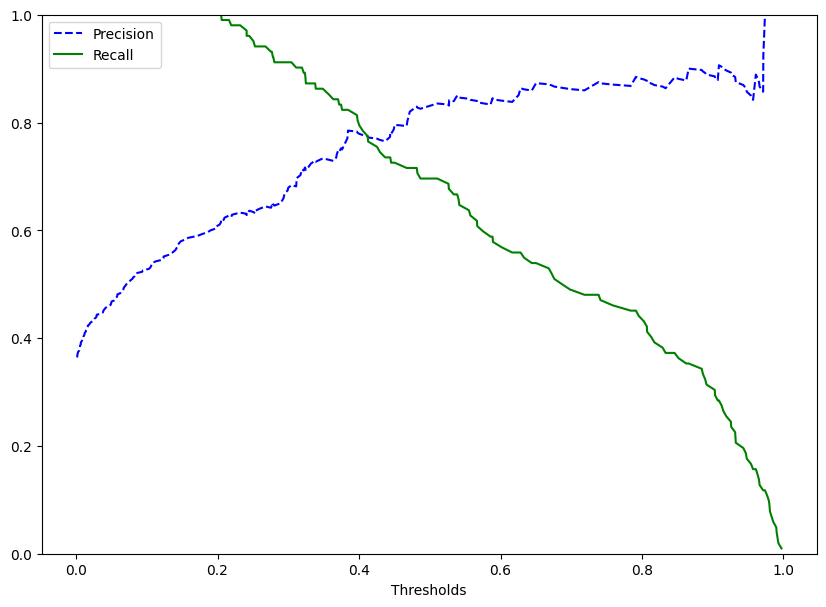

In [ ]:
y_scores_lr = lr.predict_proba(x_train)

precisions_lr, recalls_lr, thresholds_lr = metrics.precision_recall_curve(y_train, y_scores_lr[:,1])

plt.figure(figsize=(10,7))
plt.plot(thresholds_lr, precisions_lr[:-1], "b--", label="Precision")
plt.plot(thresholds_lr, recalls_lr[:-1], "g-", label="Recall")

plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()

In [ ]:
optimal_threshold = .40

y_pred_train = lr.predict_proba(x_train)

y_pred_train = y_pred_train[:,1] >= optimal_threshold

y_pred_test = lr.predict_proba(x_test)

y_pred_test = y_pred_test[:,1] >= optimal_threshold

print("Train Accuracy:",metrics.accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",metrics.accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.8428571428571429
Test Accuracy: 0.875


In [ ]:
print(metrics.classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       178
           1       0.78      0.79      0.79       102

    accuracy                           0.84       280
   macro avg       0.83      0.83      0.83       280
weighted avg       0.84      0.84      0.84       280

